In [89]:
from matplotlib import pyplot as plt
import numpy as np

In [90]:
D = [[0,206,429,1504,963,2976,3095,2979,1949],[206,0,233,1308,802,2815,2934,2786,1771],
[429,233,0,1075,671,2684,2799,2631,1616],
[1504,1308,1075,0,1329,3273,3053,2687,2037],
[963,802,671,1329,0,2013,2142,2054,996],
[2976,2815,2684,3273,2013,0,808,1131,1307],
[3095,2934,2799,3053,2142,808,0,379,1235],
[2979,2786,2631,2687,2054,1131,379,0,1059],
[1949,1771,1616,2037,996,1307,1235,1059,0]]
cities=['BOS','NYC','DC','MIA','CHI','SEA','SF','LA','DEN']


In [96]:
def discrepancy(loc):
    d = 0
    for i in range(9):
        for j in range(9):
            d+=(np.sqrt((loc[i][0]-loc[j][0])**2+(loc[i][1]-loc[j][1])**2)-D[i][j])**2
    return d
def partial(loc):
    p = []
    for i in range(9):
        p_i = np.array([0,0])
        for j in range(9):
            if i!=j:
                p_i[0]+=(loc[i][0]-loc[j][0])*2.0*(np.sqrt((loc[i][0]-loc[j][0])**2+(loc[i][1]-loc[j][1])**2)-D[i][j])
                /np.sqrt((loc[i][0]-loc[j][0])**2+(loc[i][1]-loc[j][1])**2)
                p_i[1]+=(loc[i][1]-loc[j][1])*2.0*(np.sqrt((loc[i][0]-loc[j][0])**2+(loc[i][1]-loc[j][1])**2)-D[i][j])
                /np.sqrt((loc[i][0]-loc[j][0])**2+(loc[i][1]-loc[j][1])**2)
        p.append(p_i)
    return np.array(p)
def map_D(D):
    Loc=np.array([[1800,200],[1800,0],[1600,0],[1500,-500],[1000,0],[-800,500],[-1000,0],[-500,-500],[0,0]])
    eta = 0.000001
    dd=1000
    d = discrepancy(Loc)
    p = np.array(partial(Loc))
    p_x = p[:,0]
    p_y = p[:,1]
    while sum(p_x*p_x)+sum(p_y*p_y)>1e-3 or abs(dd)>1e-6:
        d_old = d
        Loc = Loc-eta*partial(Loc)
        d = discrepancy(Loc)
        dd = d_old-d
        p = np.array(partial(Loc))
        p_x = p[:,0]
        p_y = p[:,1]
    print(Loc, p, d, dd)
    return Loc

In [97]:
loc = map_D(D)

[[ 1965.136646   401.216605]
 [ 1811.966788   240.500419]
 [ 1680.547776    41.895442]
 [ 1789.324613 -1064.672631]
 [ 1033.979081   100.909143]
 [ -967.71299    656.823577]
 [-1105.33172   -134.351609]
 [ -880.164537  -499.593762]
 [   72.252464   -42.757123]] [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]] 62167.6045159 0.0


(-1500, 1000)

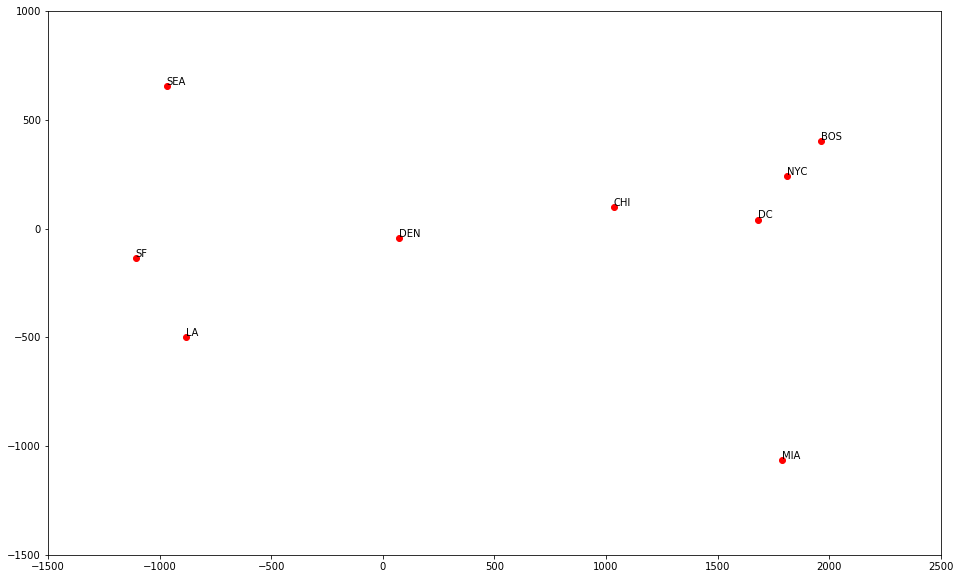

In [98]:
%matplotlib inline
plt.figure(figsize=(16,10))
for i in range(9):
    plt.plot(loc[i][0],loc[i][1],'ro')
    plt.annotate(cities[i], xy=(loc[i][0], loc[i][1]), xytext=(loc[i][0]-2, loc[i][1]+5))
plt.xlim(-1500,2500) 
plt.ylim(-1500,1000)

